# 911 Calls Capstone Project

In the capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

**Import numpy and pandas**

In [50]:
import numpy as np
import pandas as pd

**Import visualization libraries and set `%matplotlib notebook``**

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib notebook

**Let's read in the csv file as a dataframe called df**

In [52]:
df = pd.read_csv('911.csv')

**Check the info() and head of the df**

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [54]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


**Finding the top 5 townships (twp) for 911 calls  using** ``value_counts()``

In [55]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Lower Merion, Abington, Norristown, Upper Merion and Cheltenham are the five top townships that called 919.

**Finding the top 5 zipcodes for 911 calls using** ``value_counts()``

In [56]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**By using the 'title' column, it is seen that there are 110 unique title codes representing the different reasons for calling 919**

In [57]:
df['title'].nunique()

110

**By looking into these title codes using ``df['title'].unique()`` we see that in the titles column there are "Reasons/Departments" specified before the title code. These reasons vary for each call. These are EMS, Fire, and Traffic. We can use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

*For example, if the title column value is **Fire: GAS-ODOR/LEAK**, the Reason column value would be **Fire**.*

In [58]:
df['Reason']=df['title'].apply(lambda title : title.split(':')[0])

**With ``value_counts()`` method we see that the most common Reasons for a 911 call are**:

* EMS
* Traffic
* Fire

In [59]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**we can use seaborn to create a countplot of 911 calls by Reason.**

<IPython.core.display.Javascript object>


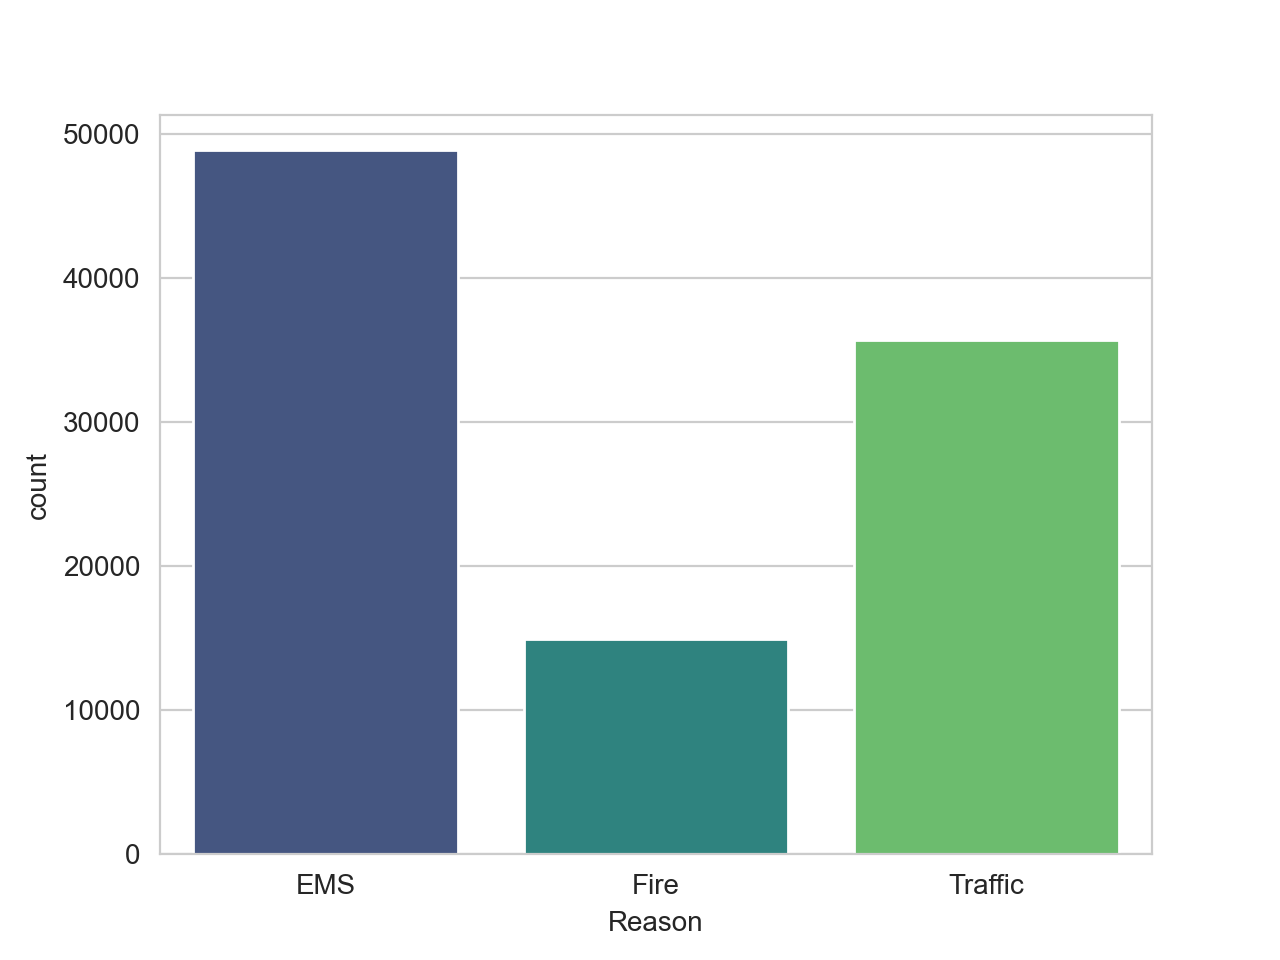

<AxesSubplot:xlabel='Reason', ylabel='count'>

In [61]:
sns.countplot(x='Reason',data=df,palette='viridis')

**By looking into time information. We can check the data type of the objects in the timeStamp column**

In [62]:
type(df['timeStamp'].loc[0])

str

**These timestamps are still strings. We need to use ``pd.to_datetime`` to convert the column from strings to DateTime objects.**

(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

In [63]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [64]:
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

**We can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour
    time.minute
    time.second

In [65]:
time = df['timeStamp'].iloc[20]

In [66]:
time.hour

17

In [67]:
time.minute

47

In [68]:
time.second

2

**Now that the timestamp column are actually DateTime objects not strings,we can use .apply() to create 3 new columns called Hour, Month, and Day of Week. We create these columns based on the timeStamp column.**

In [69]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

**Knowing that the Day of Week is an integer 0-6. We use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [70]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [71]:
df['Day of Week'] = df['Day of Week'].map(dmap)

**We can use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

<IPython.core.display.Javascript object>


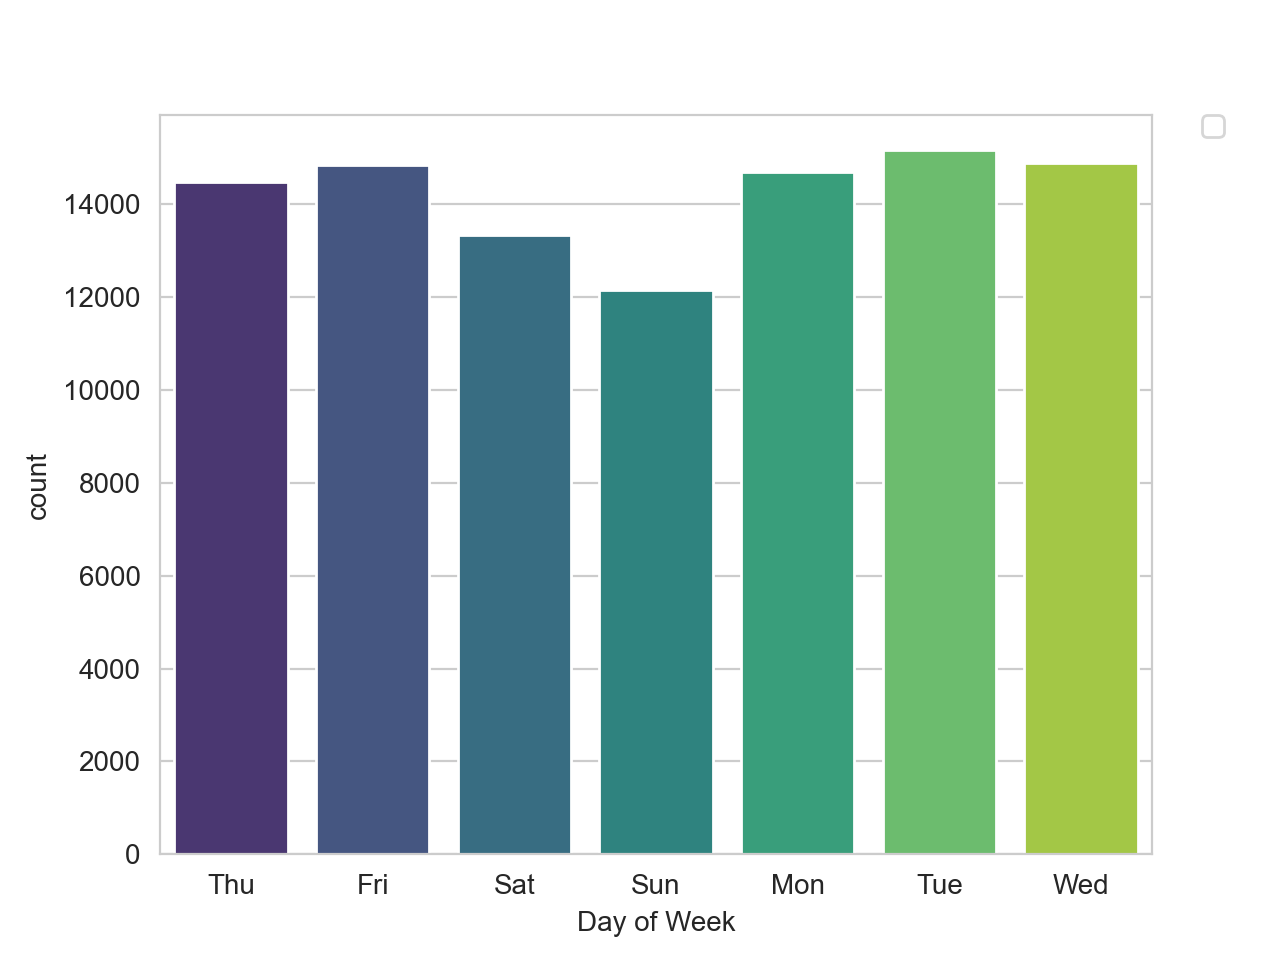

No handles with labels found to put in legend.


In [72]:
sns.countplot(x='Day of Week',data=df, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<IPython.core.display.Javascript object>


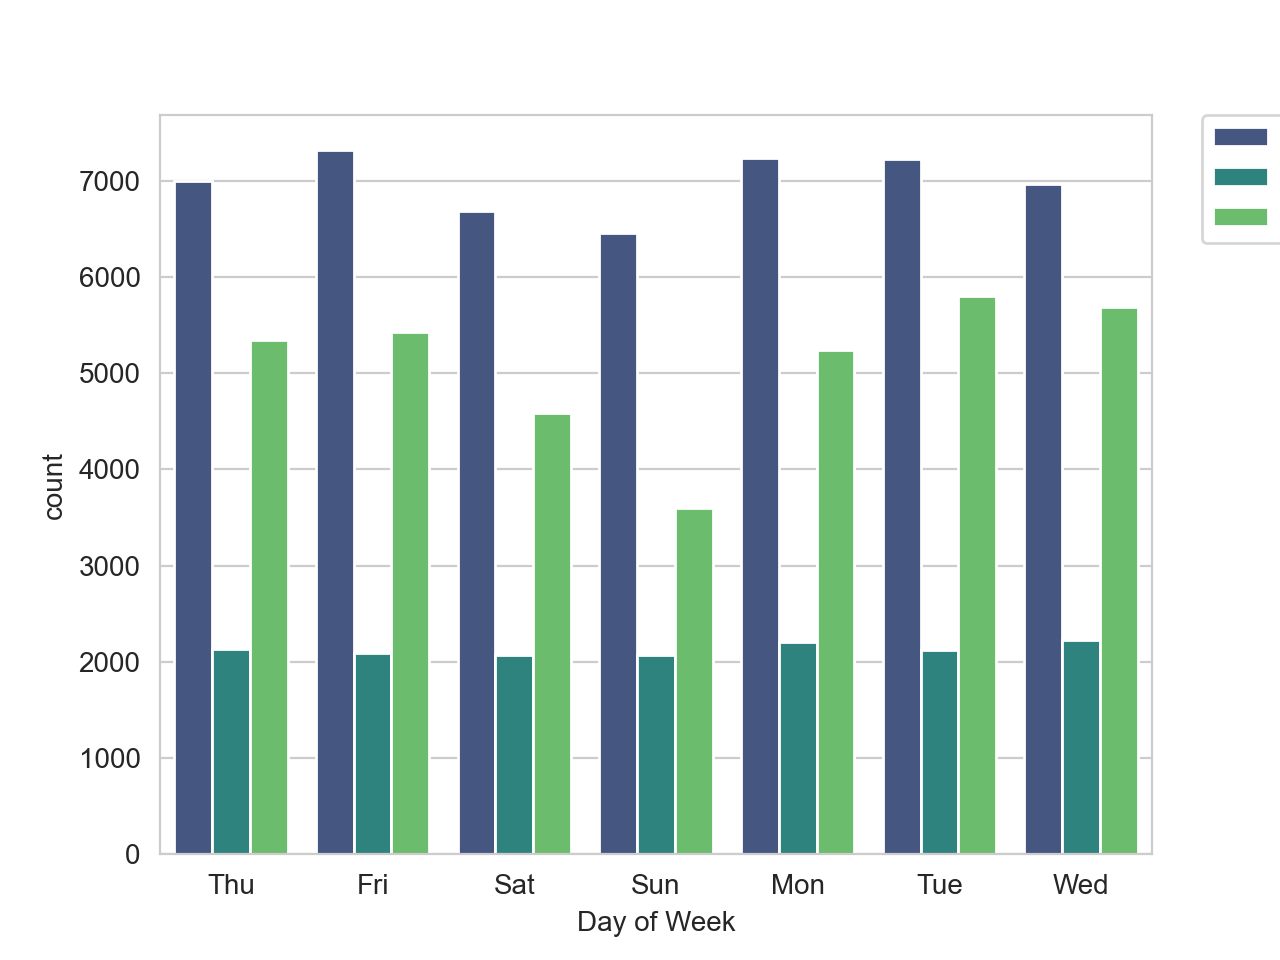

In [73]:
sns.countplot(x='Day of Week',hue='Reason',data=df, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

<IPython.core.display.Javascript object>


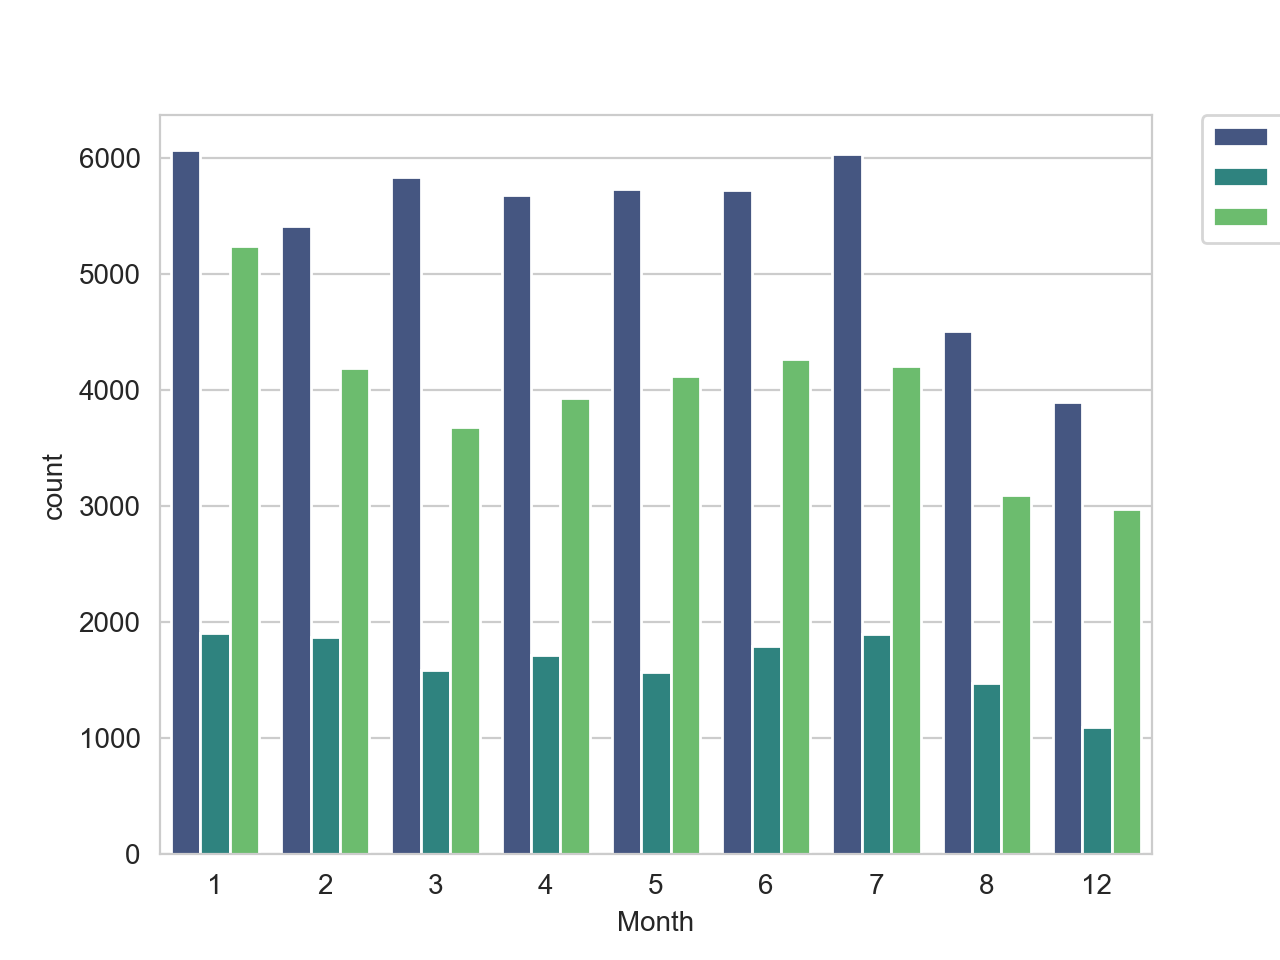

In [74]:
sns.countplot(x='Month',hue='Reason',data=df, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**We notice that the plot for calls per month is missing some Months (particularly month of 9,10,11), let's fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas**

**We can create a gropuby object called byMonth, where we group the DataFrame by the month column and use the ``count()`` method for aggregation. Then we use the head() method on this returned DataFrame.**

In [75]:
byMonth= df.groupby('Month').count()

In [76]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Let's plot a simple plot of the dataframe indicating the count of calls per month.**

<IPython.core.display.Javascript object>


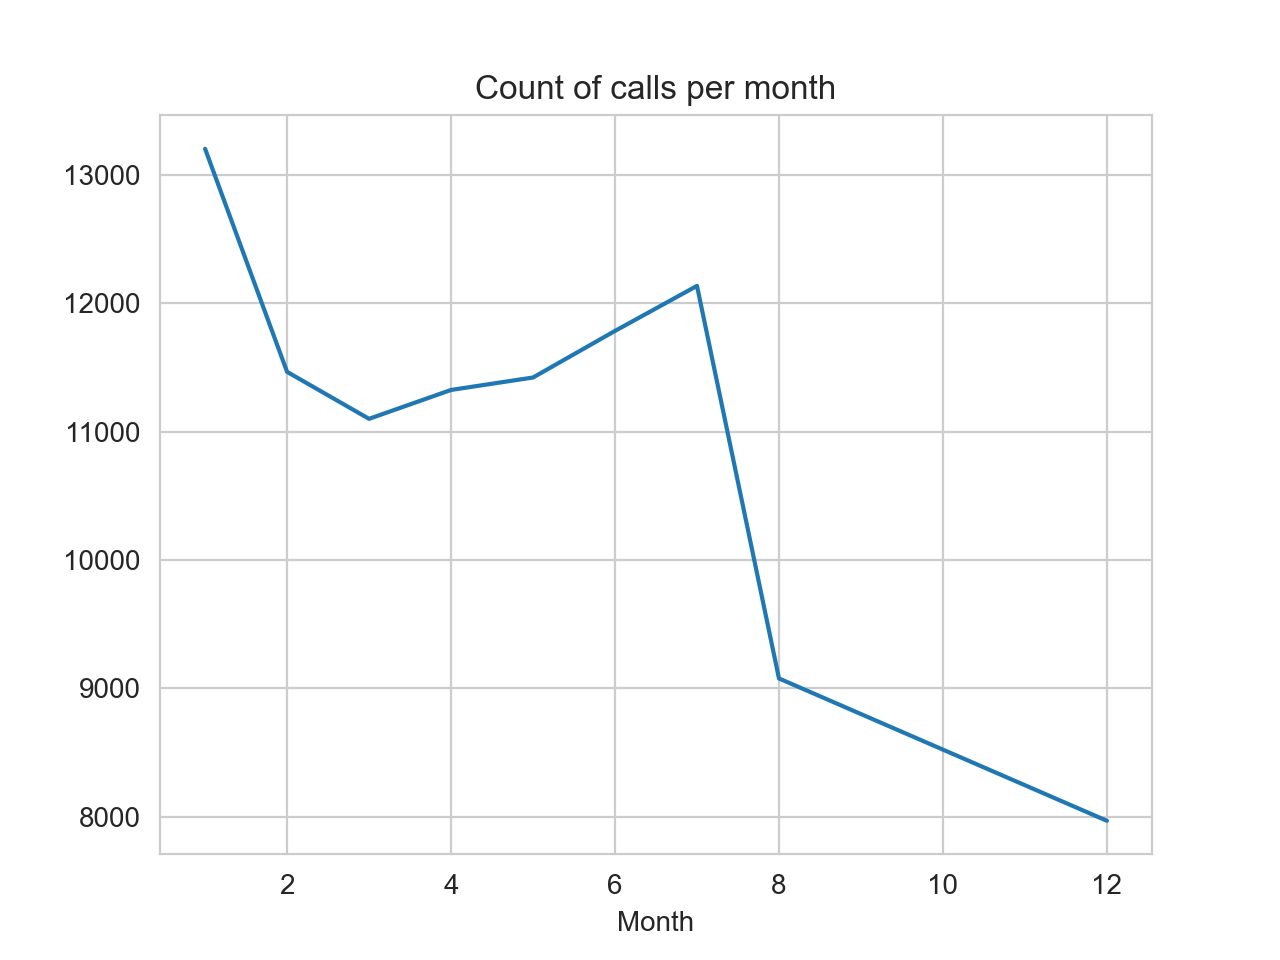

Text(0.5, 1.0, 'Count of calls per month')

In [93]:
byMonth['lat'].plot()
plt.title('Count of calls per month')

**Now we can use seaborn's ``lmplot()`` to create a linear fit on the number of calls per month. Note that we may need to reset the index to a column.**

In [78]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


<IPython.core.display.Javascript object>


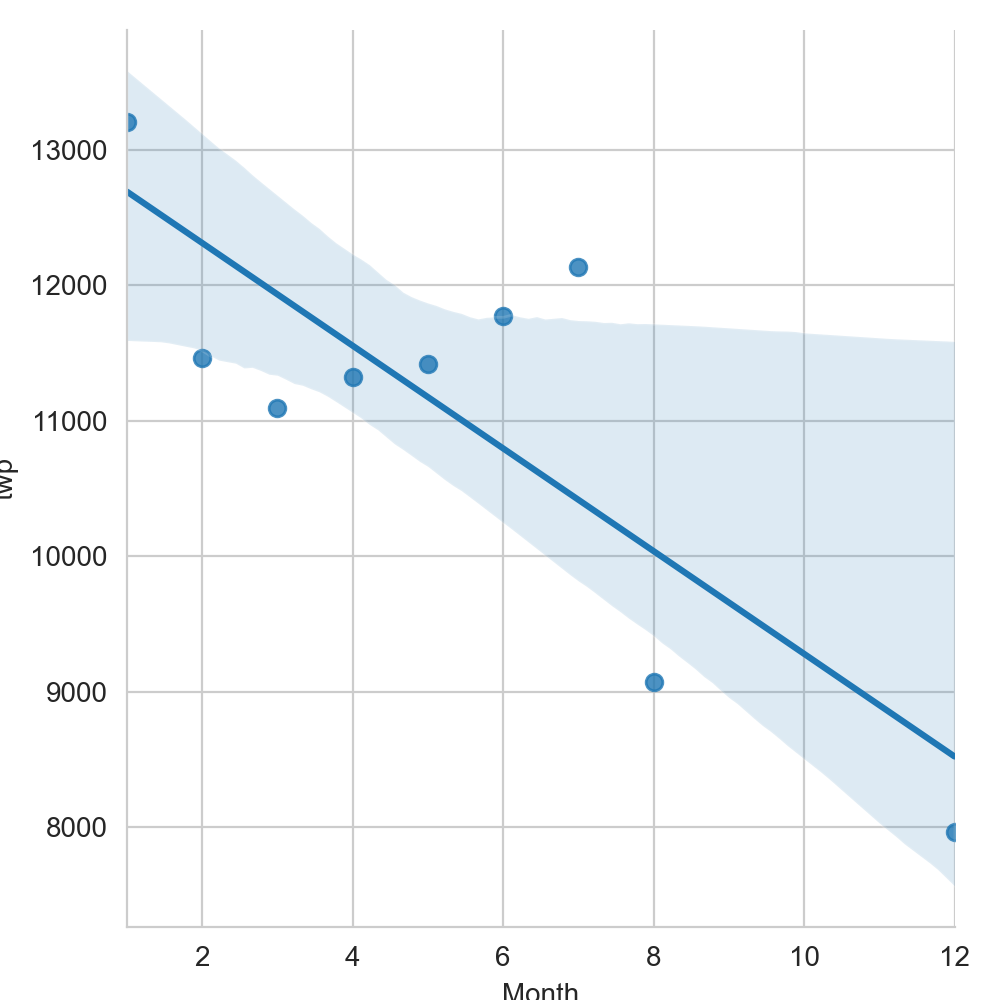

In [79]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**We create a new column called 'Date' that contains the date from the timeStamp column. We need to use apply along with the `.date()` method.** 

In [80]:
t = df['timeStamp'].iloc[0]

In [81]:
df['Date']=df['timeStamp'].apply(lambda t : t.date())

In [82]:
#df['Date']=df['timeStamp'].apply(lambda timeStamp : timeStamp.date())# second way

In [83]:
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

In [84]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


**Now we groupby this Date column with the `count()` aggregate and create a plot of counts of 911 calls.**

In [85]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


In [86]:
df.groupby('Date').count()['lat']

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: lat, Length: 259, dtype: int64

<IPython.core.display.Javascript object>


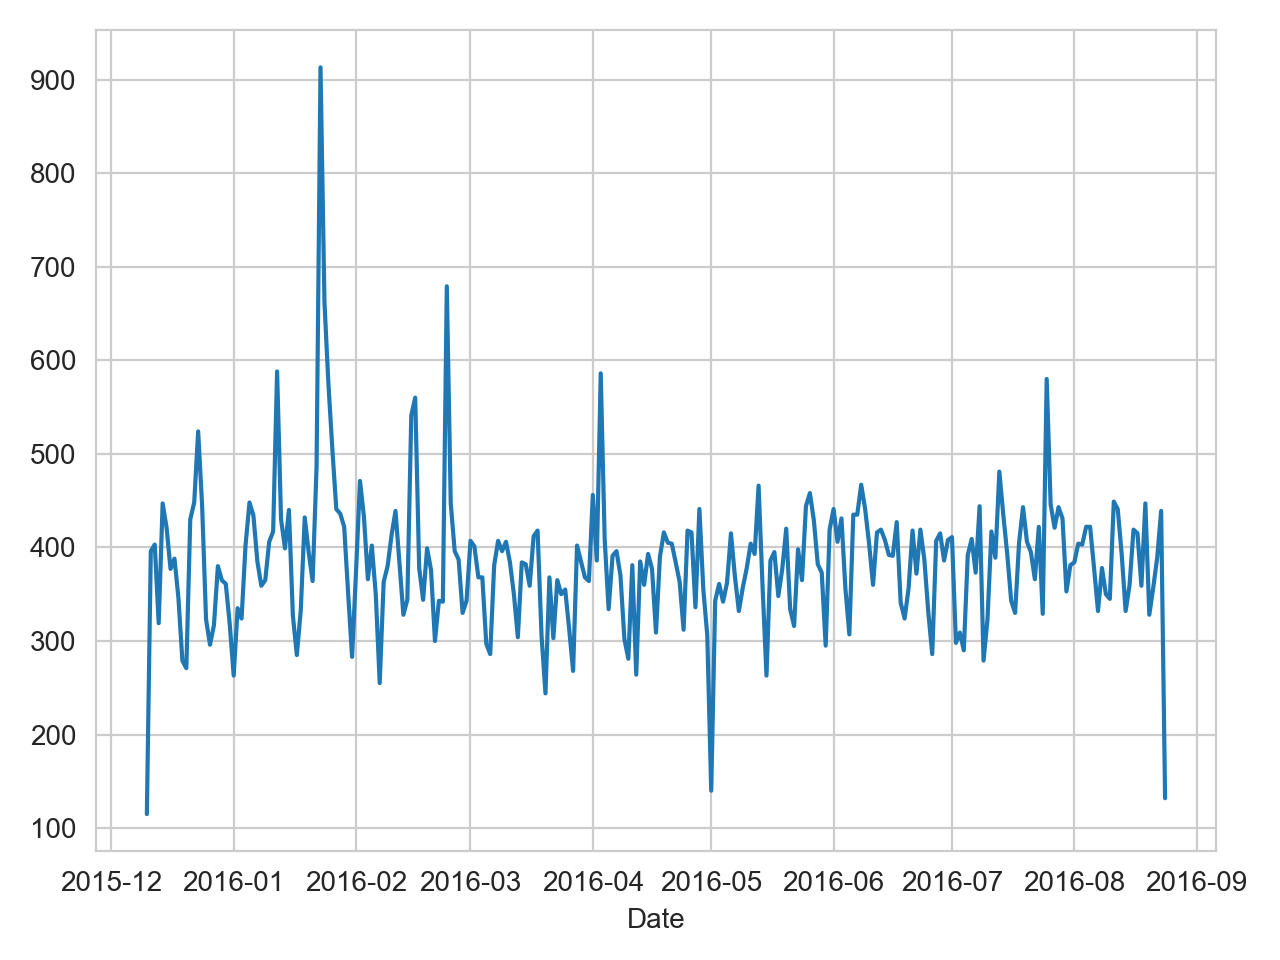

In [89]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

**Now we recreate this plot by creating 3 separate plots with each plot representing a Reason for the 911 call**

<IPython.core.display.Javascript object>


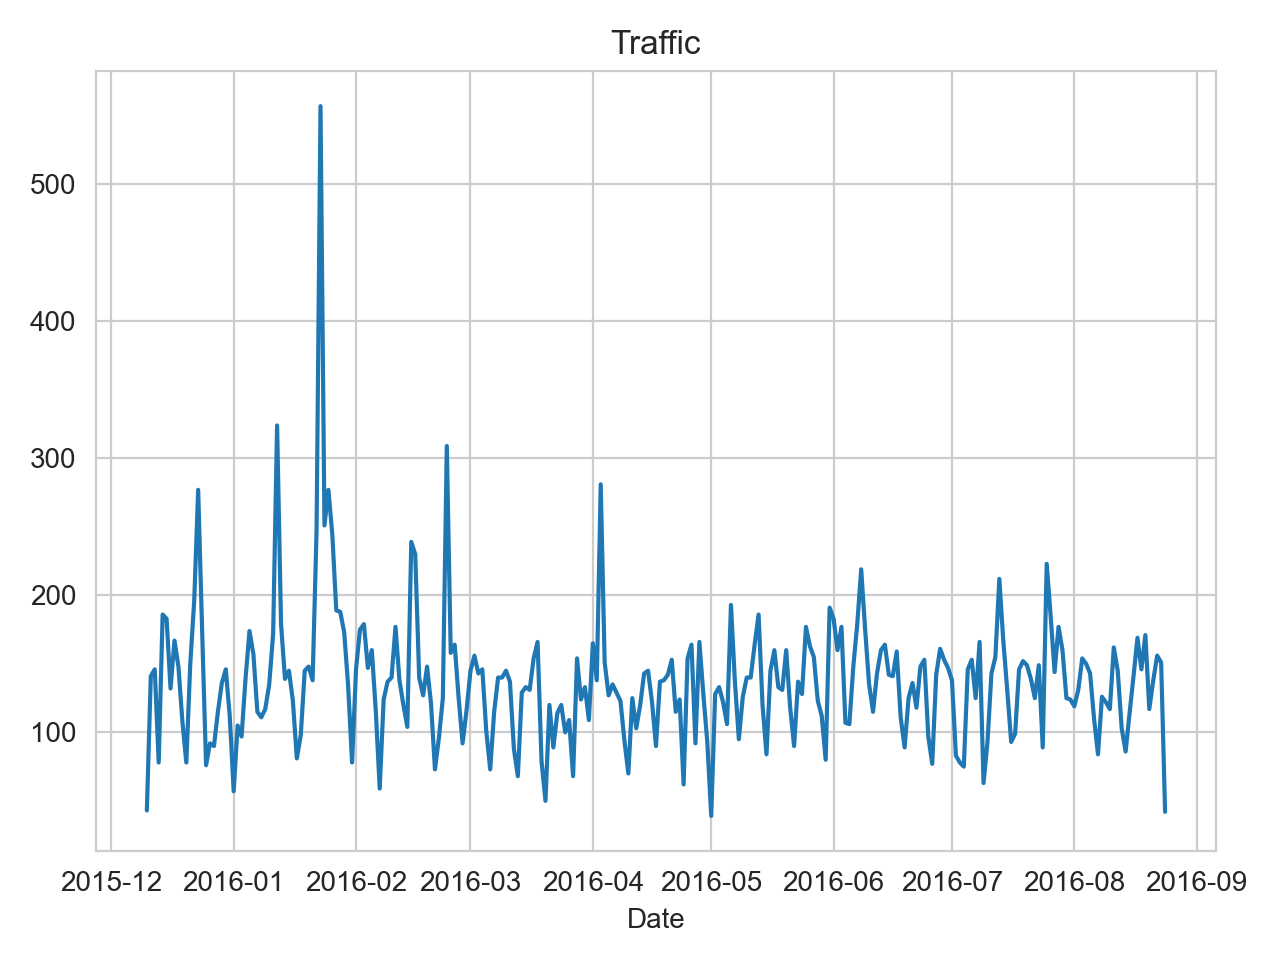

In [90]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

<IPython.core.display.Javascript object>


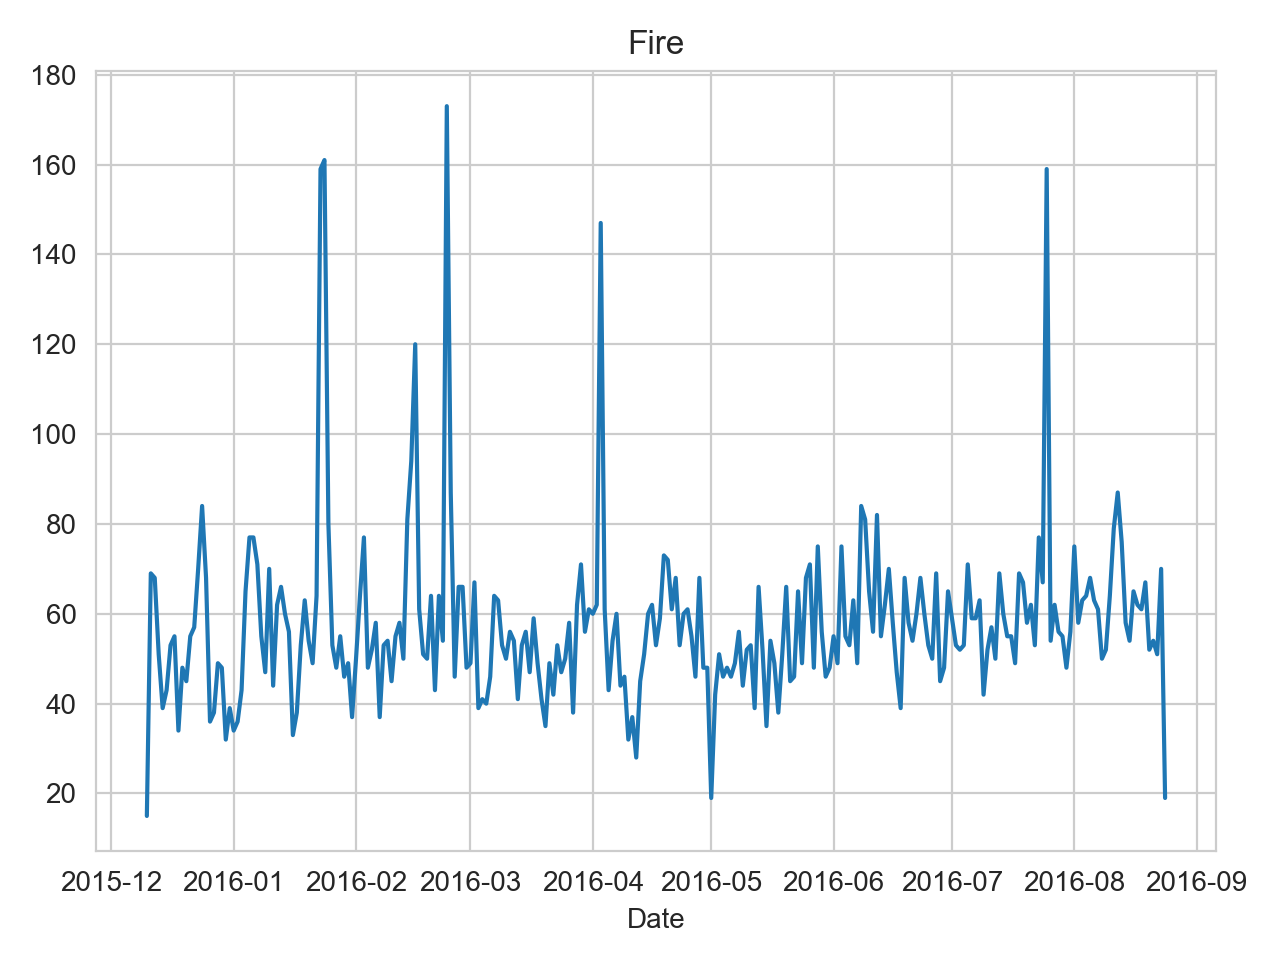

In [91]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

<IPython.core.display.Javascript object>


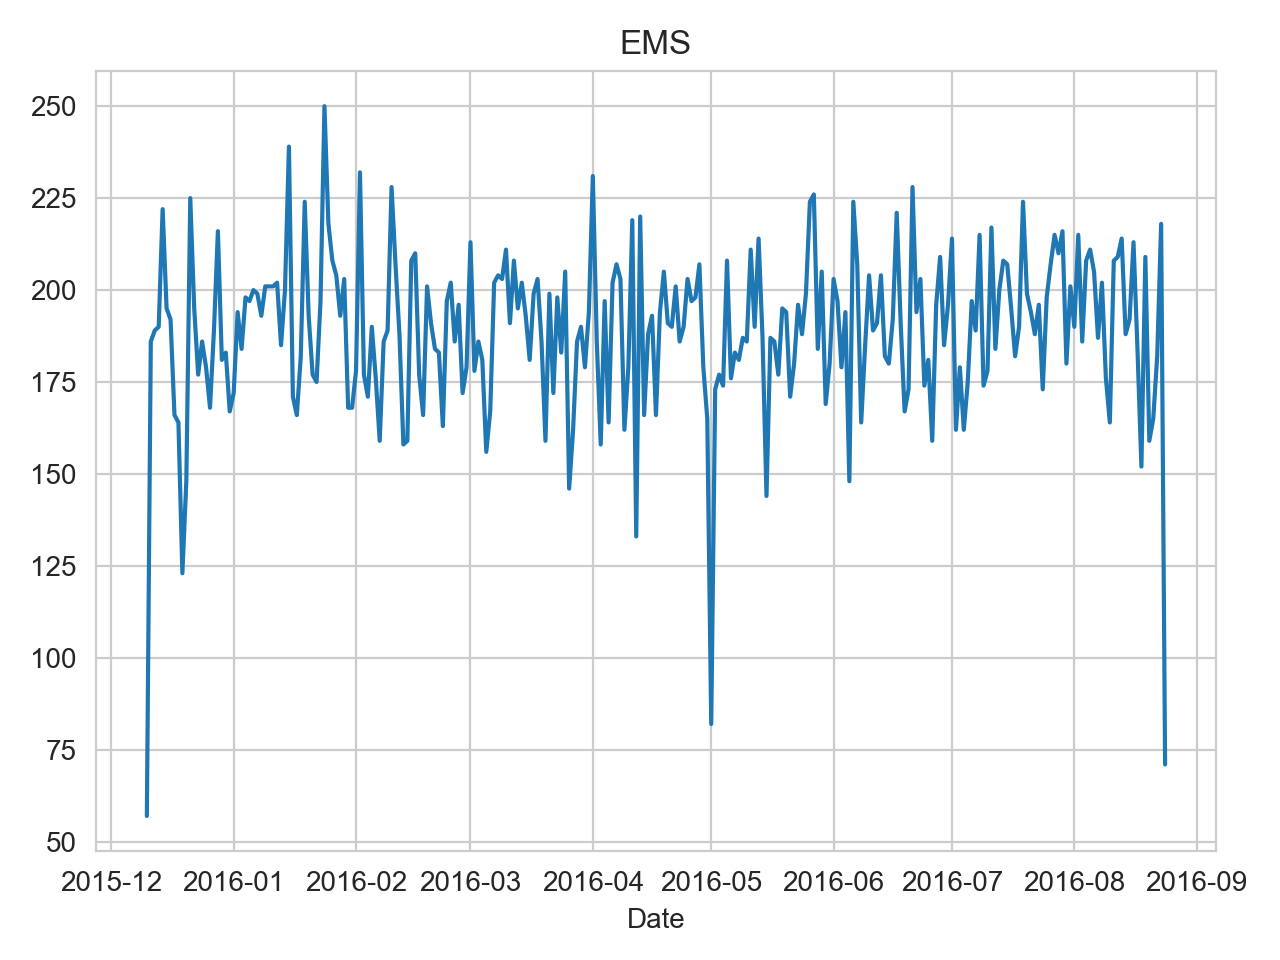

In [92]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

**Now let's create a heatmaps using seaborn. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but we'll use the combine groupby with an ``unstack`` method.**

(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html)

In [94]:
df.groupby(by=['Day of Week','Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19    686  686   686  590    686        686  686   682  686   
            20    668  668   668  597    668        668  668   662  668   
            21    575  575   575  508    575        575  574   572  575   
            22    490  490   490  432    490        490  490   485  490   
            23    335  335   335  294    335        335  334   335  335   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201  
...                  ...    ...   ...  
Wed         19       686    686   686  
            20       668    668   668  
            21       575    575   575  
            22       490    490   490  
            23       335    335   335  

[168 rows x 12 columns]

In [95]:
dayHour= df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

**HeatMap using this new DataFrame.**

<IPython.core.display.Javascript object>


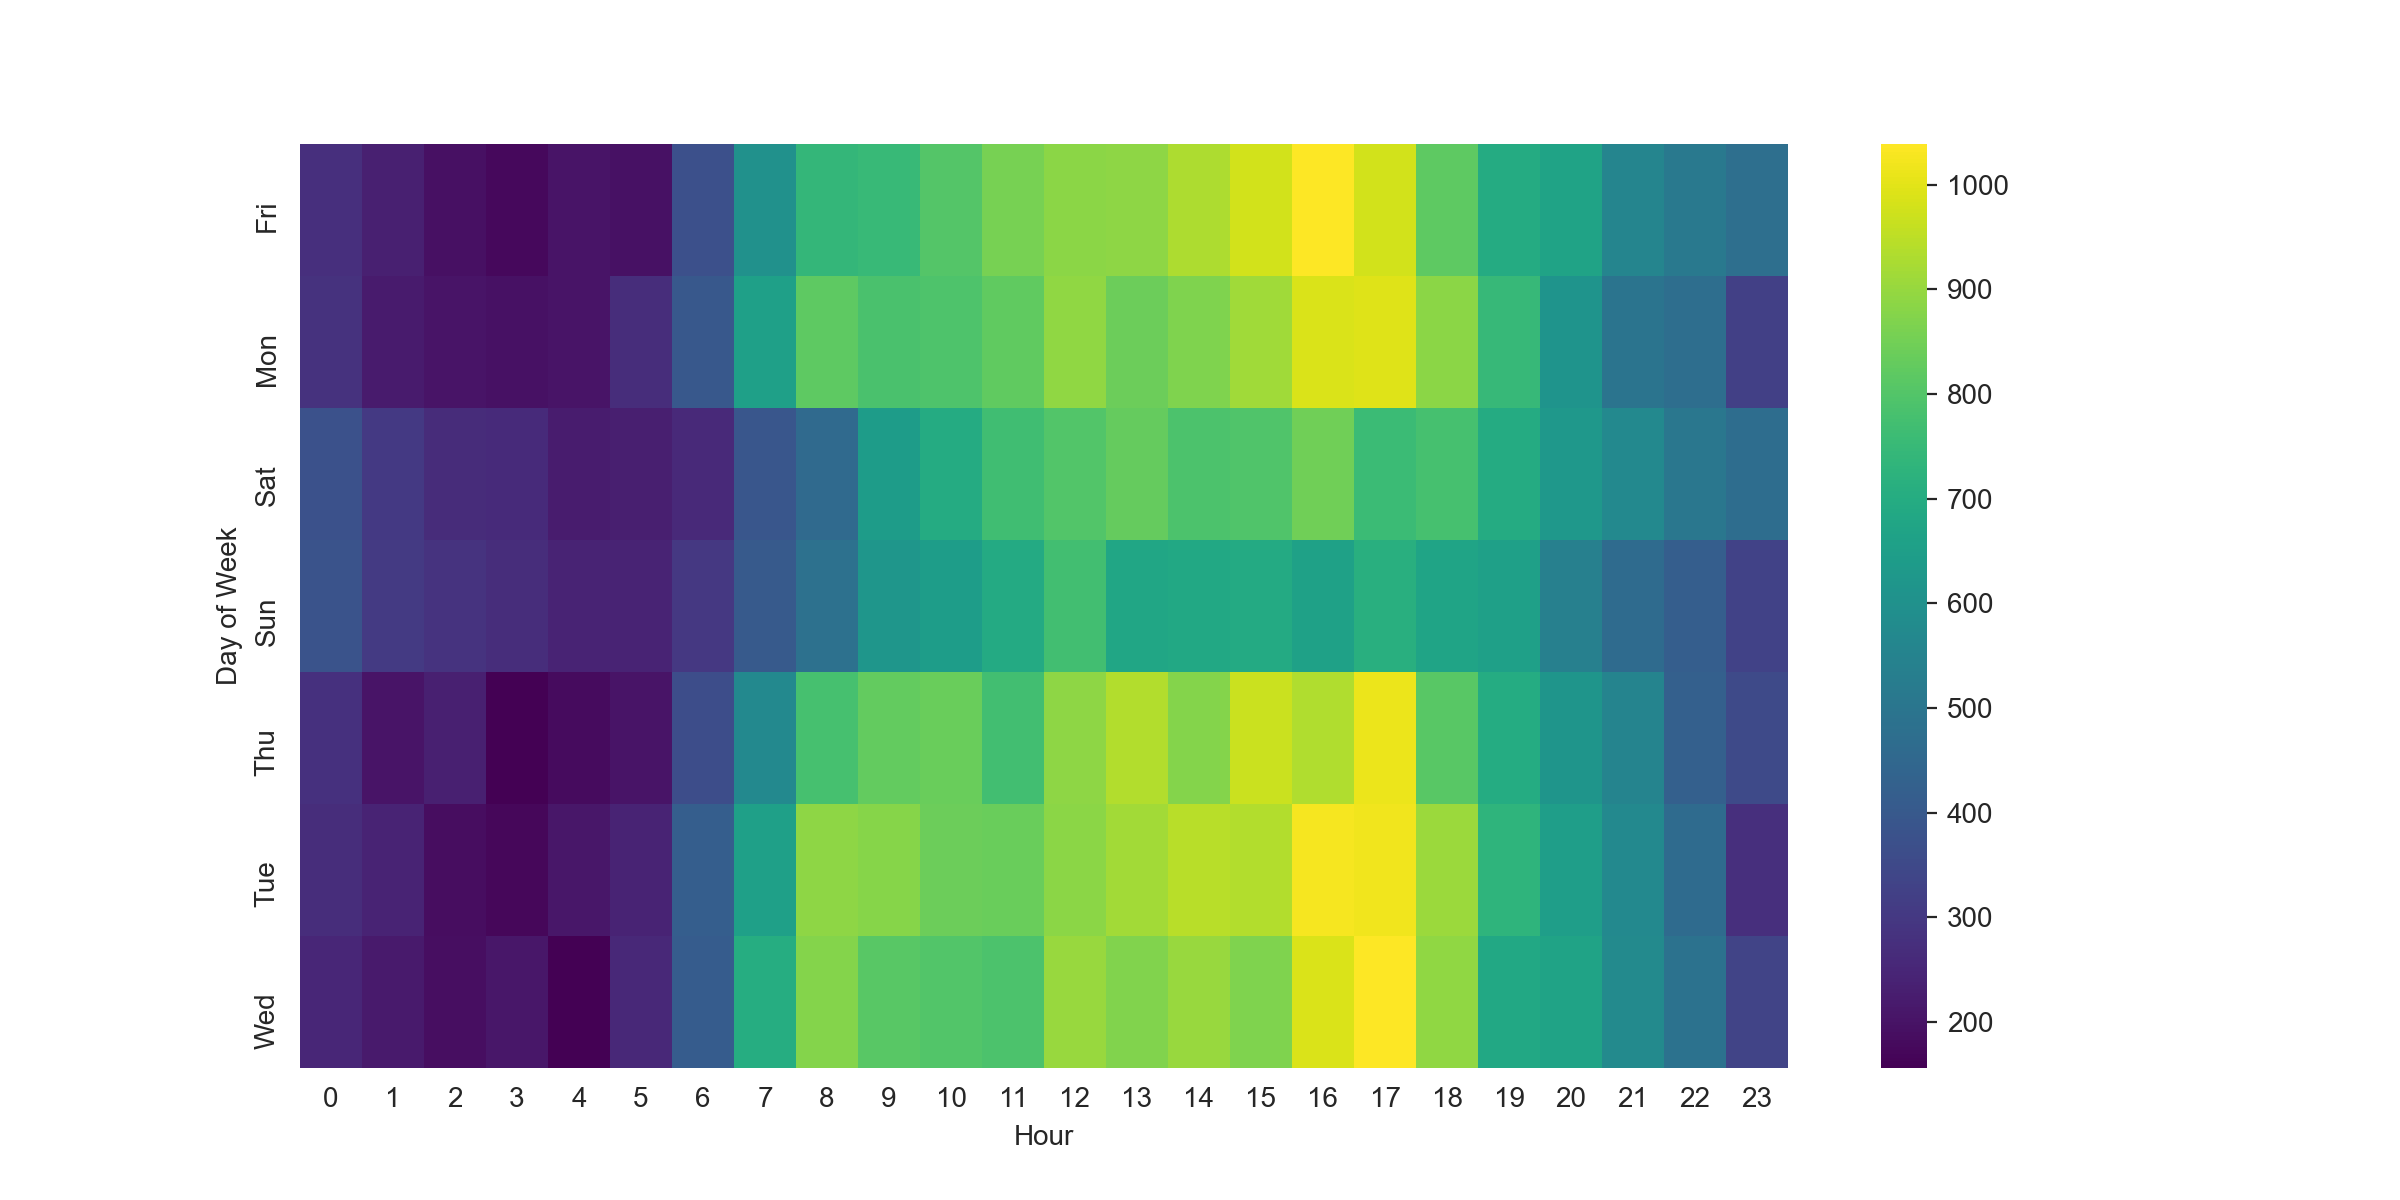

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

In [96]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

**Clustermap using this DataFrame.**

<IPython.core.display.Javascript object>


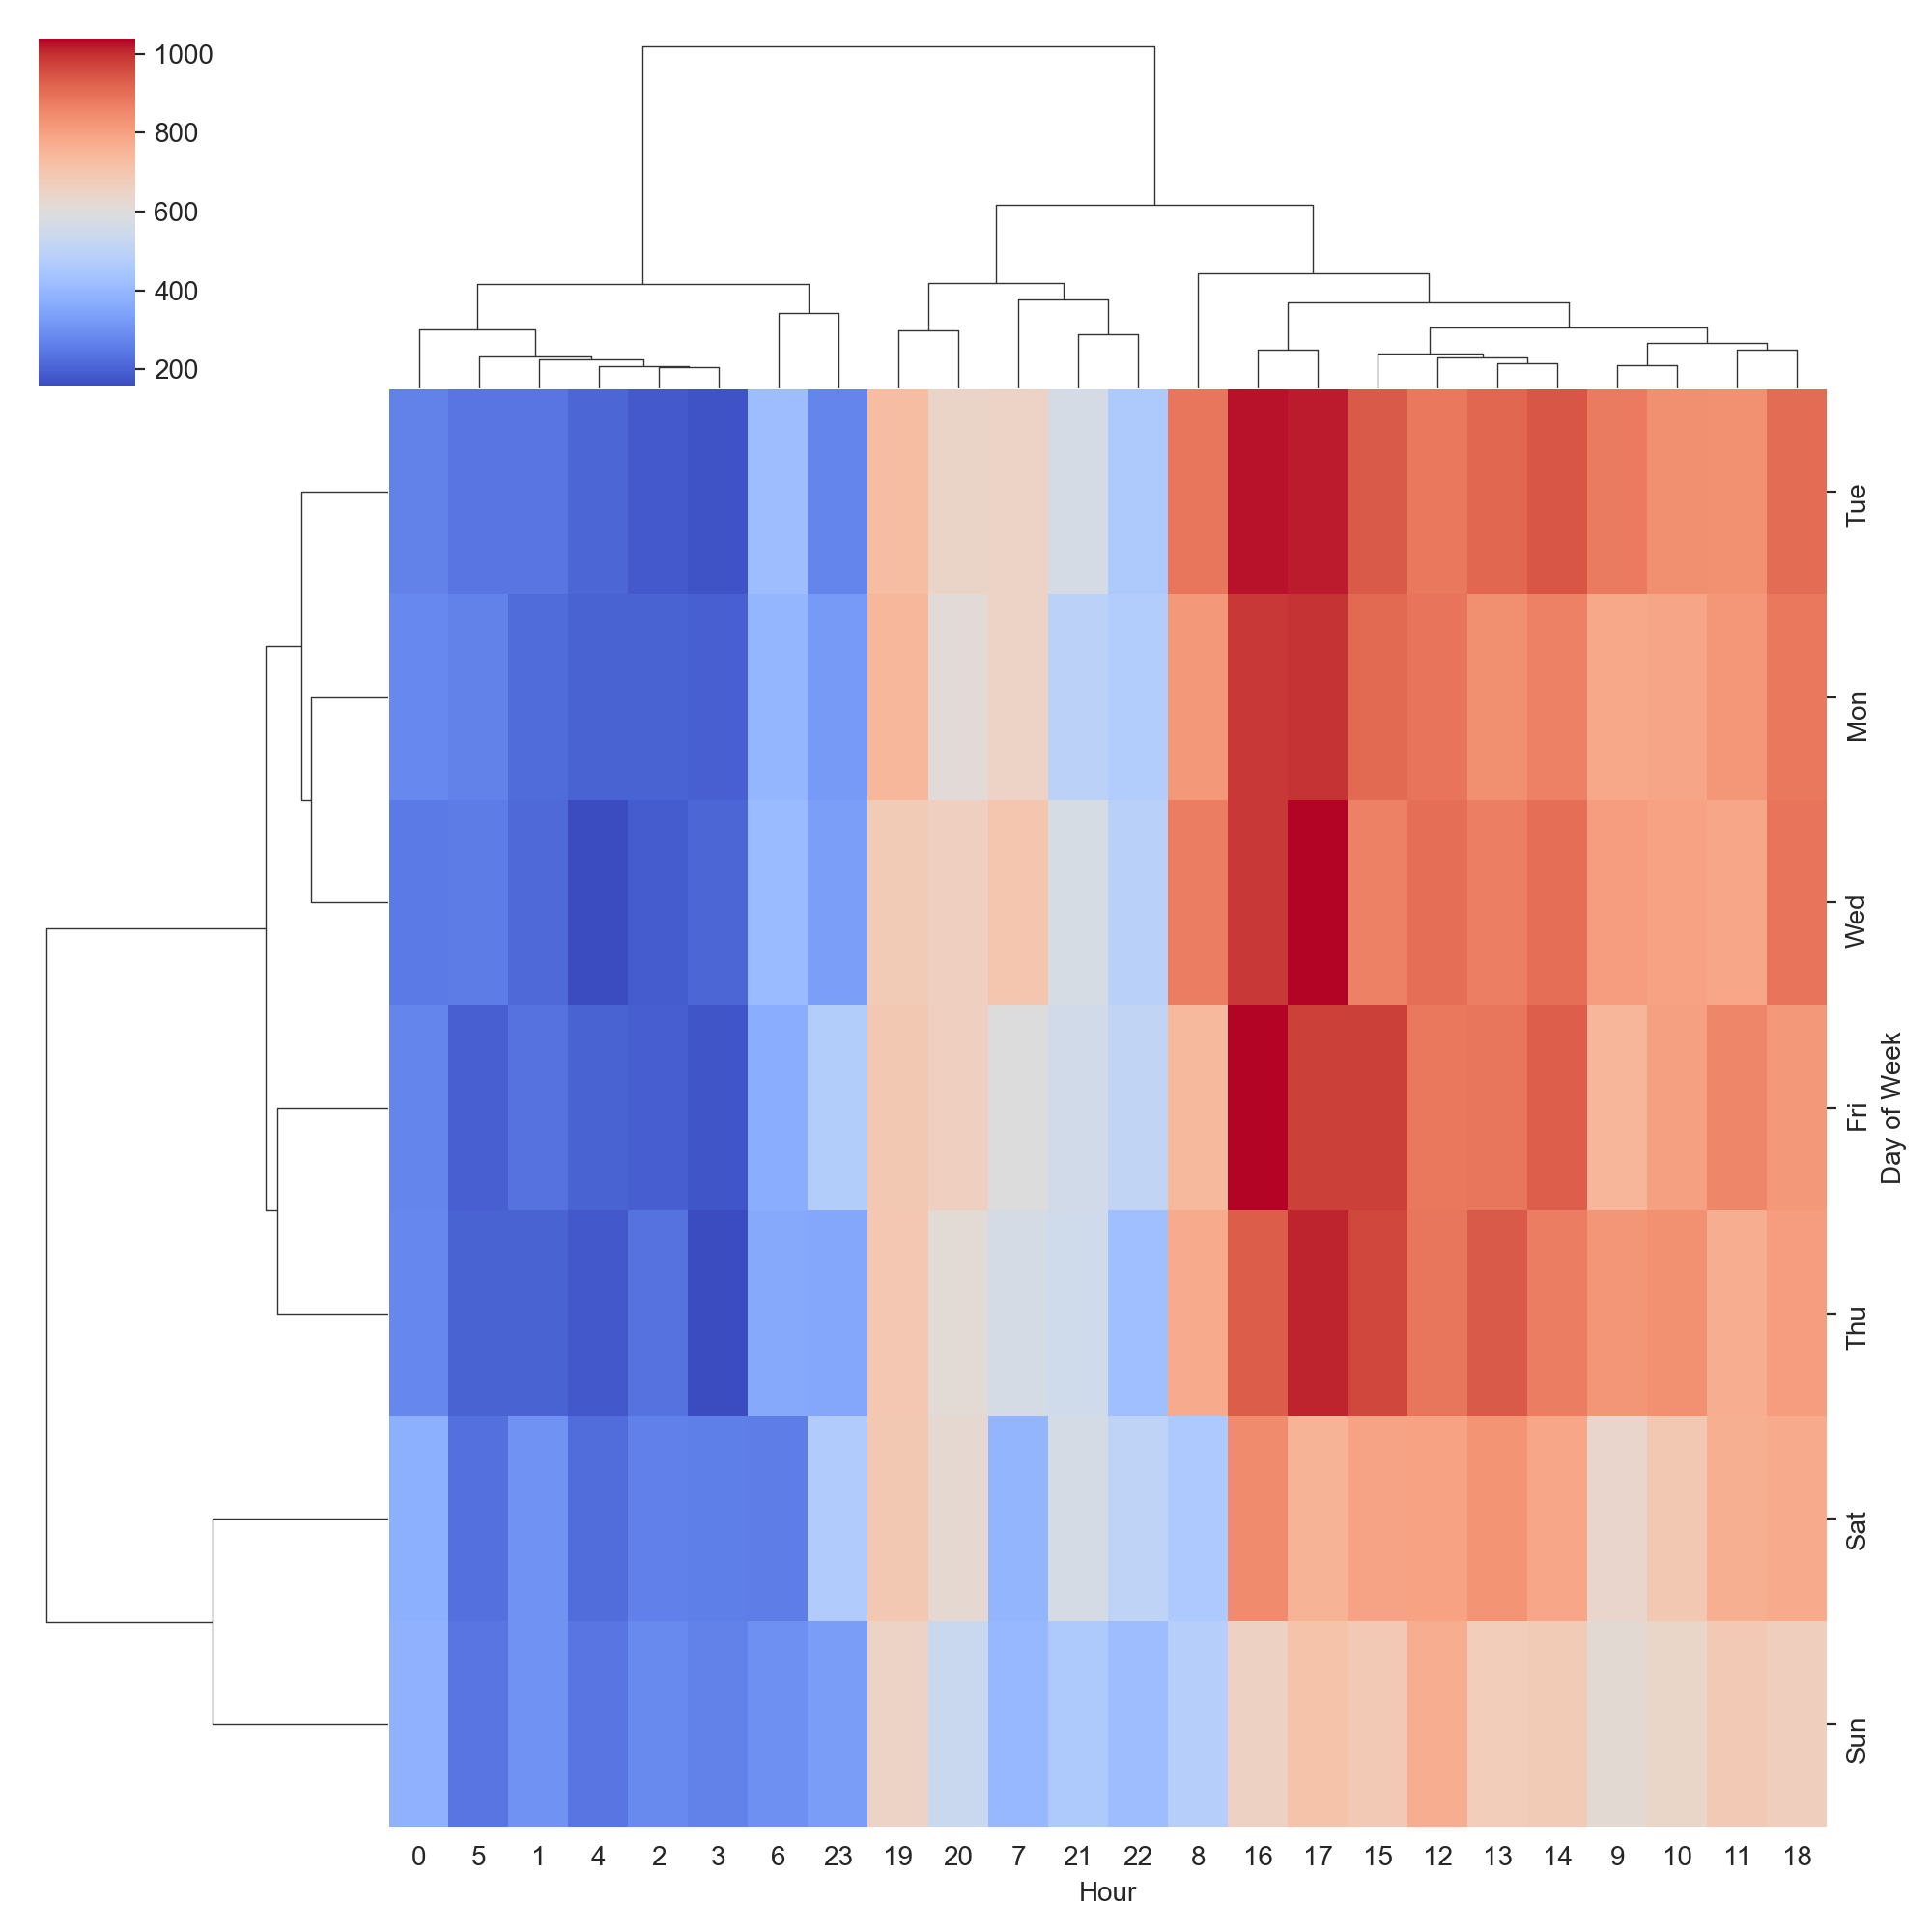

In [97]:
sns.clustermap(dayHour,cmap='coolwarm')

**Now we repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [98]:
dayMonth= df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()

<IPython.core.display.Javascript object>


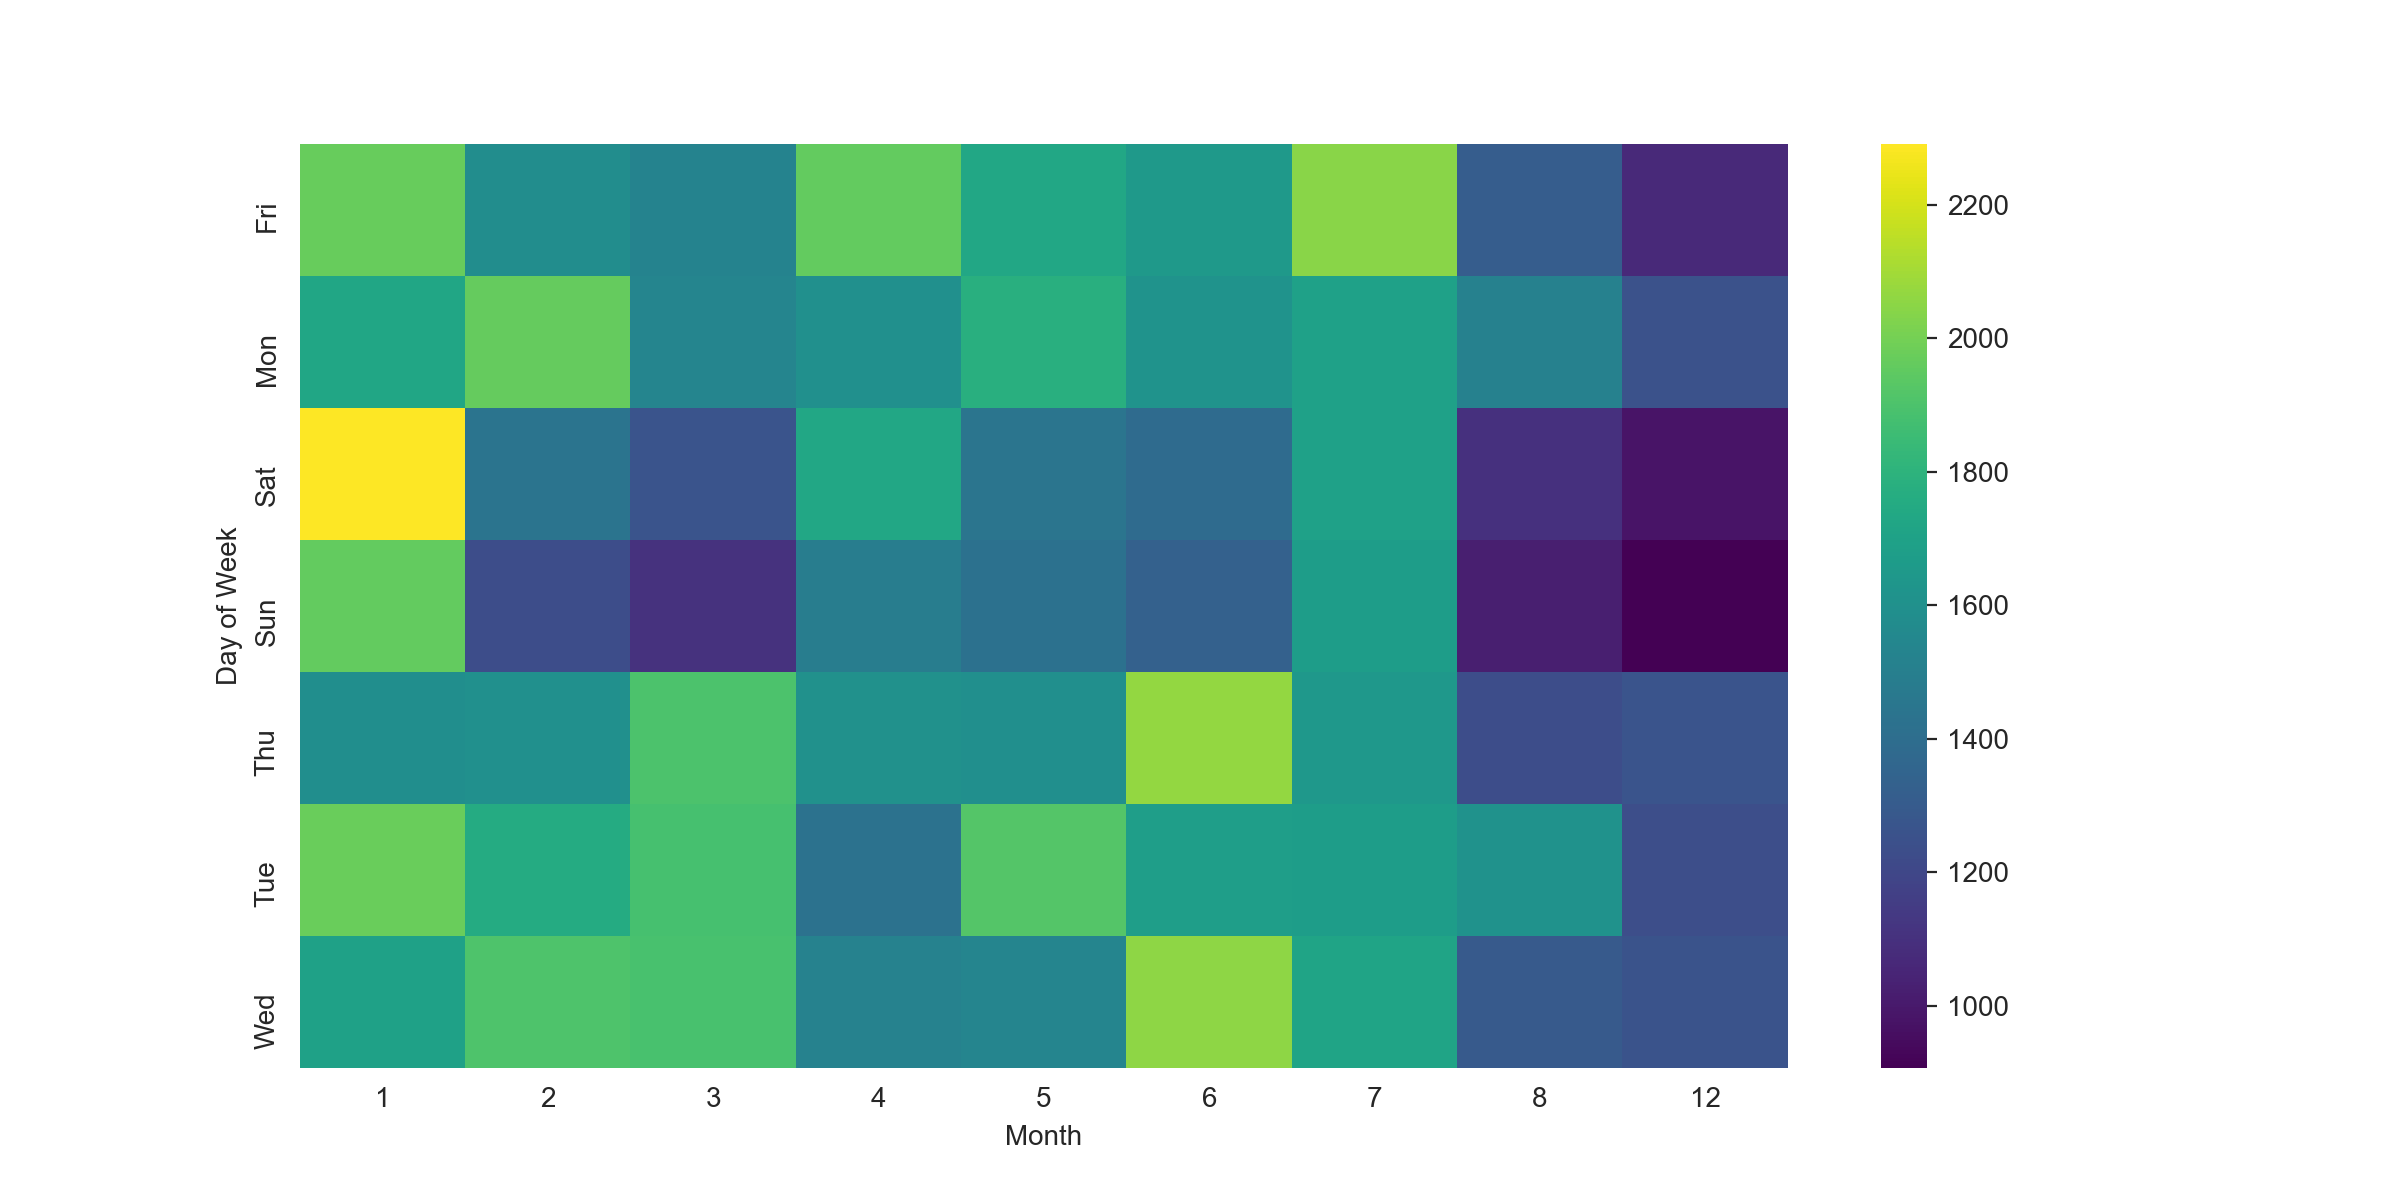

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

In [101]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

<IPython.core.display.Javascript object>


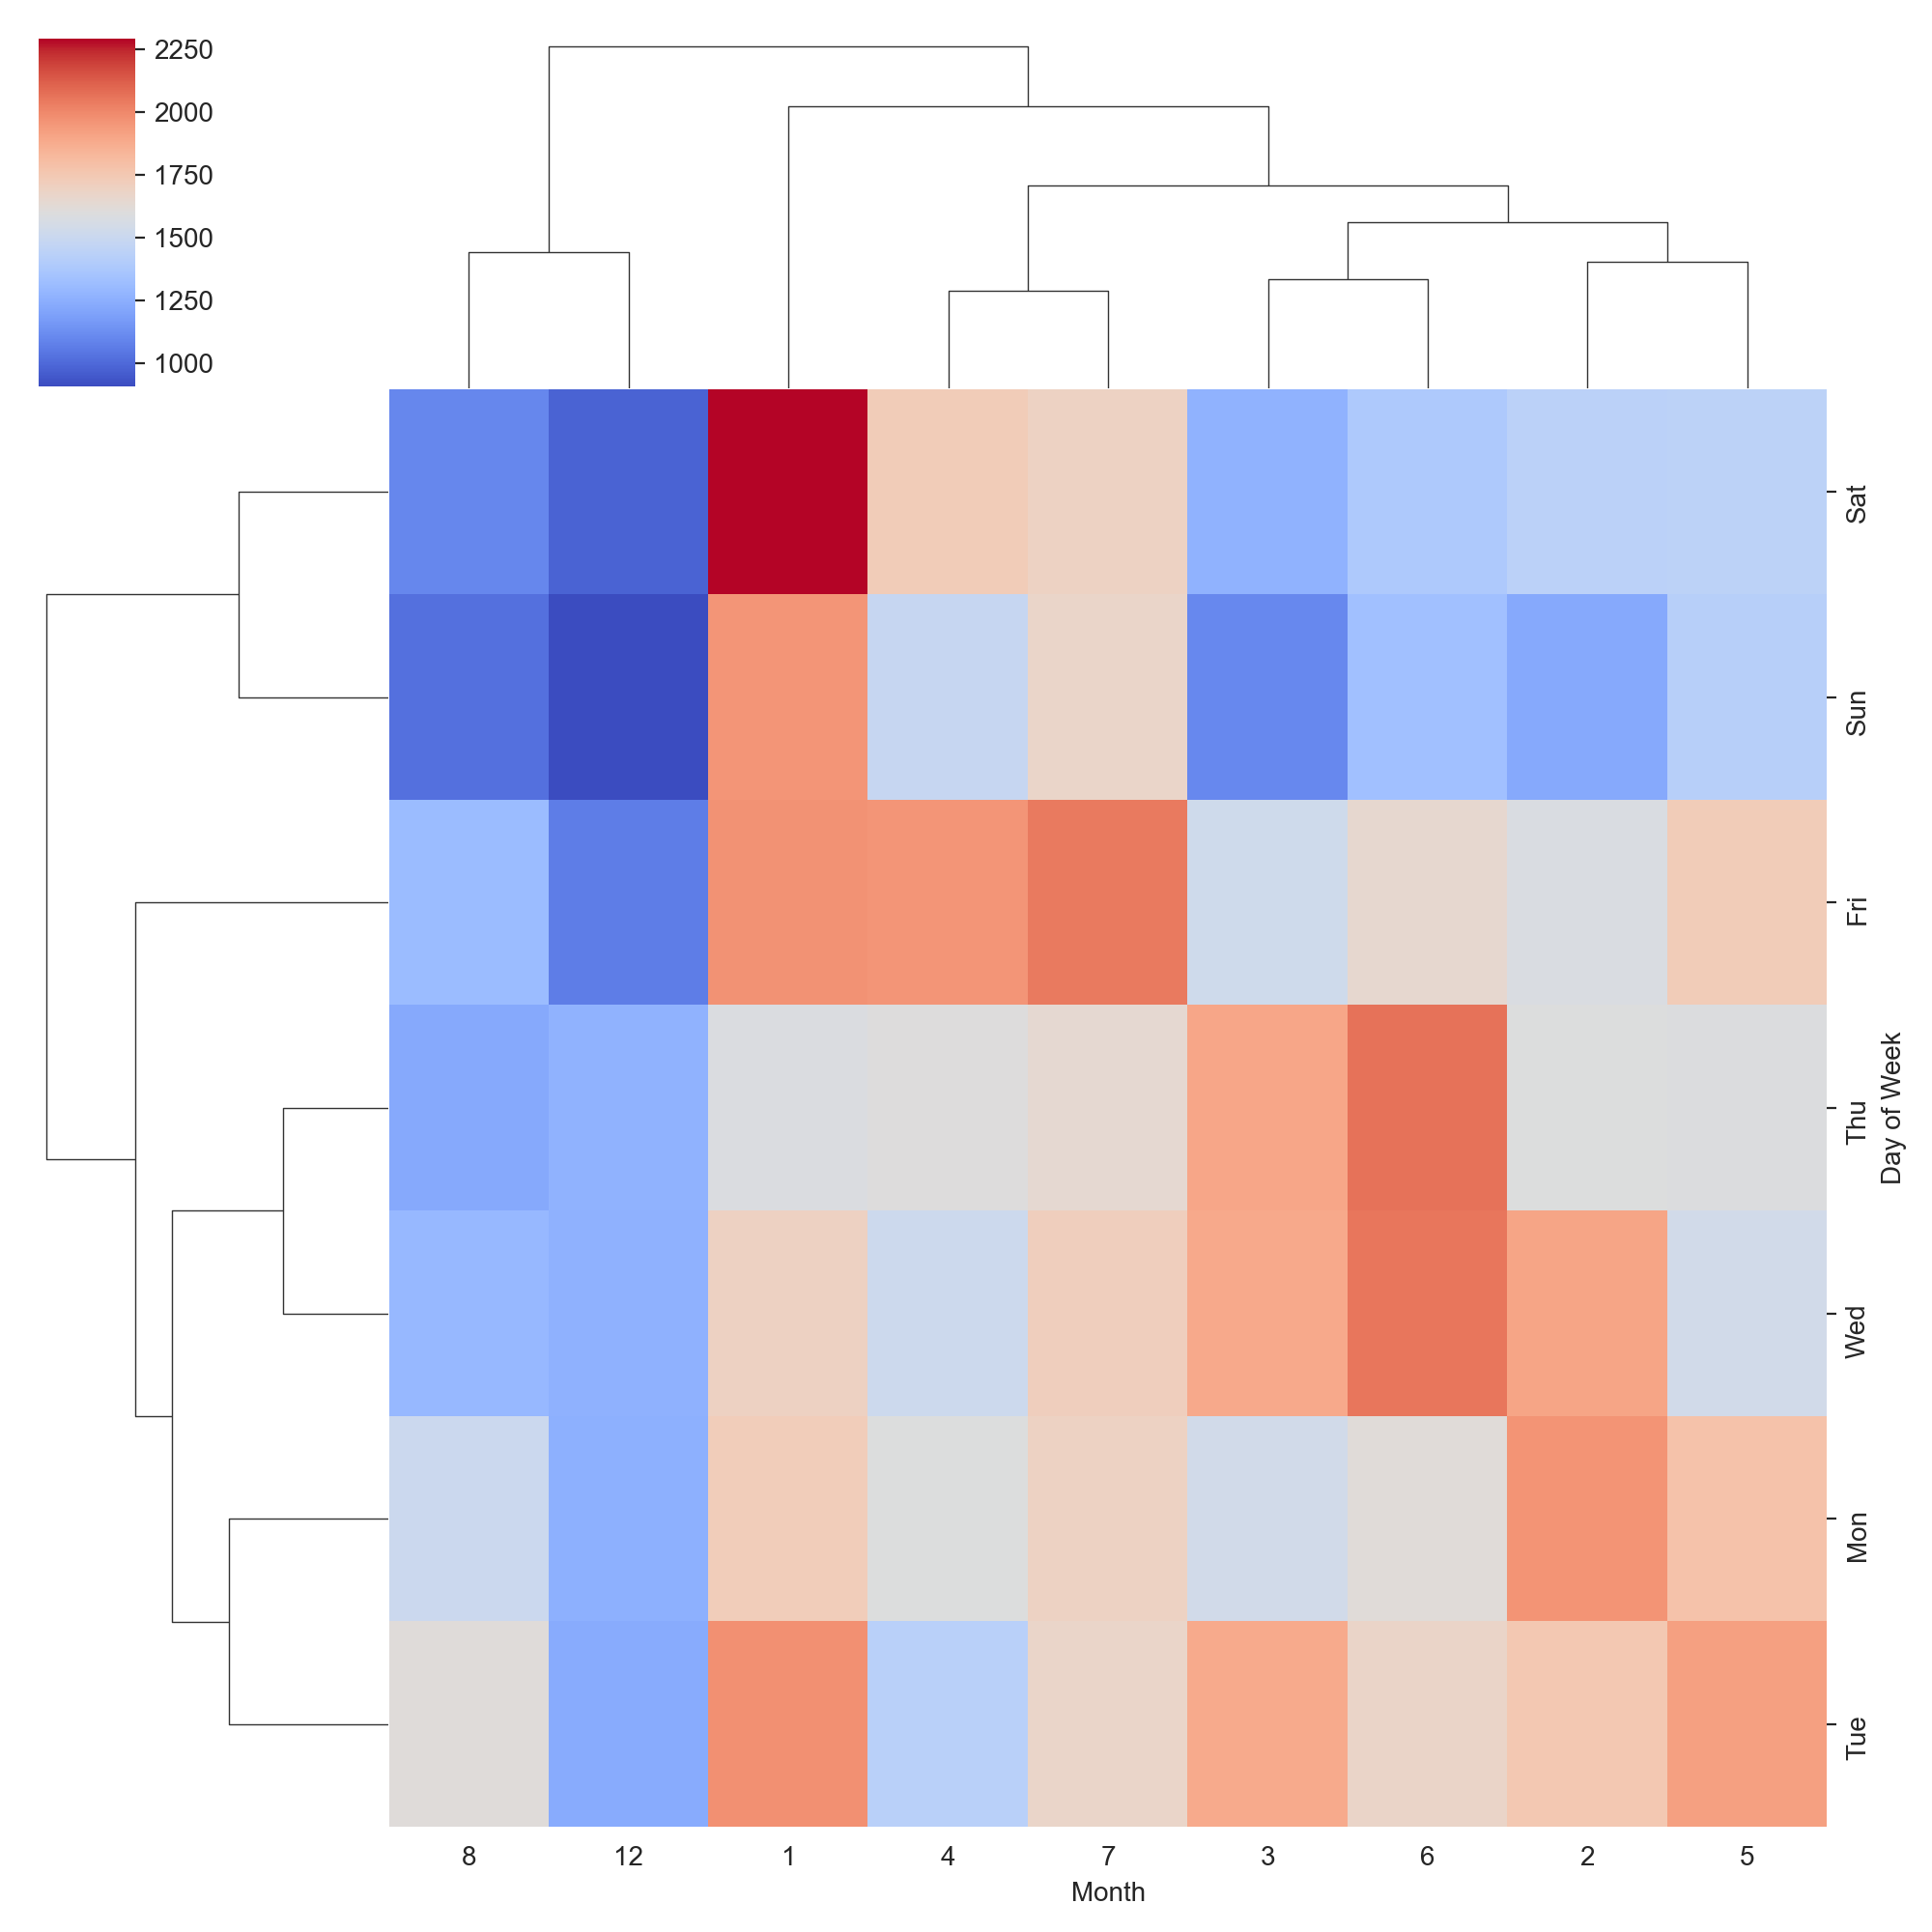

In [100]:
sns.clustermap(dayMonth,cmap='coolwarm')